In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import keras
import numpy as np

from tensorflow.python.keras import backend as K
from tensorflow.python.keras.datasets.cifar import load_batch
from tensorflow.python.keras.utils.data_utils import get_file
from tensorflow.python.util.tf_export import tf_export

from keras.layers import Conv2D, MaxPooling2D, Flatten, Activation
from keras.models import Sequential


/home/kabir/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
@tf_export('keras.datasets.cifar10.load_data')
def load_data():
    """Loads CIFAR10 dataset.
    Returns:
        Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.
        """
    #dirname = 'cifar-10-batches-py'
    #origin = 'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz'
    #path = get_file(dirname, origin=origin, untar=True)
    path = "/home/kabir/.keras/datasets/cifar-10-batches-py"
    num_train_samples = 50000

    x_train = np.empty((num_train_samples, 3, 32, 32), dtype='uint8')
    y_train = np.empty((num_train_samples,), dtype='uint8')

    for i in range(1, 6):
        fpath = os.path.join(path, 'data_batch_' + str(i))
        (x_train[(i - 1) * 10000:i * 10000, :, :, :],
        y_train[(i - 1) * 10000:i * 10000]) = load_batch(fpath)

    fpath = os.path.join(path, 'test_batch')
    x_test, y_test = load_batch(fpath)

    y_train = np.reshape(y_train, (len(y_train), 1))
    y_test = np.reshape(y_test, (len(y_test), 1))

    if K.image_data_format() == 'channels_last':
        x_train = x_train.transpose(0, 2, 3, 1)
        x_test = x_test.transpose(0, 2, 3, 1)

    return (x_train, y_train), (x_test, y_test)

In [3]:
(x_train, y_train), (x_test, y_test) = load_data()

In [4]:
print(type(x_train))

<class 'numpy.ndarray'>


In [5]:
x_train.size

153600000

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [7]:
x_train.shape

(50000, 32, 32, 3)

In [9]:
model = Sequential()

In [10]:
print(x_train[0].shape)

(32, 32, 3)


In [11]:
data_format = K.image_data_format()
print(data_format)

channels_last


In [12]:
num_classes = 10
img_rows, img_cols = 32, 32

In [20]:
input_shape = (img_rows, img_cols, 3)

In [13]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
input_shape = (img_rows, img_cols, 3)

In [14]:
model = Sequential()
model.add(Conv2D(1, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(1, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 1)         28        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 1)         10        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 1)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 196)               0         
Total params: 38
Trainable params: 38
Non-trainable params: 0
_________________________________________________________________


In [17]:
def nice_img_printer(model, img):
    '''returns the img as a 2d array'''
    exp_img = np.expand_dims(img,axis=0)
    conv_img = model.predict(exp_img)

    conv_img = np.squeeze(conv_img, axis=0)
    conv_img = np.reshape(conv_img, (-1, 14))
    return conv_img

(14, 14)


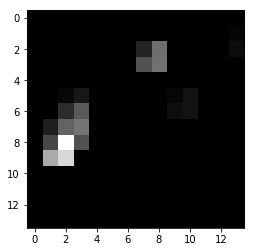

In [19]:
img = x_train[0]
img = nice_img_printer(model, img)

print(img.shape)
plt.imshow(img, cmap='gray')

In [20]:
import time
initial_time = time.time()
for i in range(x_train.shape[0]):
    img = x_train[i]
    img = nice_img_printer(model, img)
reduction_time = time.time() - initial_time
print(reduction_time)

64.40036368370056


In [28]:
half_initial_time = time.time()
for i in range(x_train.shape[0] // 2):
    img = x_train[i]
    img = nice_img_printer(model, img)
half_reduction_time = time.time() - half_initial_time
print(half_reduction_time)

31.71389603614807


In [22]:
quarter_initial_time = time.time()
for i in range(x_train.shape[0] // 4):
    img = x_train[i]
    img = nice_img_printer(model, img)
quarter_reduction_time = time.time() - quarter_initial_time
print(quarter_reduction_time)

15.79592227935791


In [23]:
by6_initial_time = time.time()
for i in range(x_train.shape[0] // 6):
    img = x_train[i]
    img = nice_img_printer(model, img)
by6_reduction_time = time.time() - by6_initial_time
print(by6_reduction_time)

11.499472379684448


In [24]:
by8_initial_time = time.time()
for i in range(x_train.shape[0] // 8):
    img = x_train[i]
    img = nice_img_printer(model, img)
by8_reduction_time = time.time() - by8_initial_time
print(by8_reduction_time)

7.79970383644104


In [25]:
by10_initial_time = time.time()
for i in range(x_train.shape[0] // 10):
    img = x_train[i]
    img = nice_img_printer(model, img)
by10_reduction_time = time.time() - by10_initial_time
print(by10_reduction_time)

7.1900954246521


In [26]:
by16_initial_time = time.time()
for i in range(x_train.shape[0] // 16):
    img = x_train[i]
    img = nice_img_printer(model, img)
by16_reduction_time = time.time() - by16_initial_time
print(by16_reduction_time)

4.308763265609741


In [27]:
by32_initial_time = time.time()
for i in range(x_train.shape[0] // 32):
    img = x_train[i]
    img = nice_img_printer(model, img)
by32_reduction_time = time.time() - by32_initial_time
print(by32_reduction_time)

1.9737164974212646
